<a href="https://colab.research.google.com/github/mcnica89/FunProblems/blob/main/Irreducible_configurations_counter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Most recent strategy:


In [48]:
import scipy.special as sp
import itertools as it

def num_irreducible_patterns(p):
  #return the number of irreducible patterns for (i_1,j_1),...,(i_p,j_p)
  #they are returned as a list [c_1,c_2,...,c_max_unique_indices]
  #where c_k is the number of patterns with k unique indices
  #e.g. for p=3 returns [1,28,68,32]


  max_unique_indices = 2*p - 2 #no need to do 2p-1 or 2p since we know these are 0

  irreducible_counts = [0 for i in range(max_unique_indices)] #array that will count irreducible configs

  for indices in it.product(range(max_unique_indices), repeat=2*p): #we create all configs of length 2p with indices in 0 to to max_unique_indices

    reducible = False
 
    for i in range(p): #check each point to see if its reducible
      point_i = {indices[2*i], indices[2*i+1]}
      other_points = set(indices[0:2*i])|set(indices[2*i+2:])
      if point_i & other_points == set(): #if overlap is empty, then point_i is reducible!
        reducible = True
        break

      
    if reducible == False:
      num_unique_indices = len(set(indices))
      irreducible_counts[num_unique_indices-1] += 1 #Note the minus 1 because python starts at index 0
  
  #We have overcounted, since for example the pattern (a,b)(b,c) will get counted multiple times by different choices for a,b,c
  #For a pattern with k unique indices, there are (max_unique_indices choose k) ways to choose what numbers will be used for a,b,c
  #and then there are k! ways to rerrange those into the a,b,c
  #So we divide as follows:
  num_patterns = [ irreducible_counts[k-1]/sp.comb(max_unique_indices,k)/sp.factorial(k) for k in range(1,max_unique_indices+1) ]
  return num_patterns

print(f"Number of patterns for 3rd power: {num_irreducible_patterns(3)}")

print(f"Number of patterns for 4th power: {num_irreducible_patterns(4)}")

print("------")

Number of patterns for 3rd power: [1.0, 28.0, 68.0, 32.0]
Number of patterns for 4th power: [1.0, 123.0, 844.0, 1268.0, 544.0, 48.0]
------


In [49]:

print(f"Number of patterns for 5th power: {num_irreducible_patterns(5)}")

KeyboardInterrupt: ignored

In [38]:
sp.comb(5,2)

10.0

In [16]:
A = (0,1,2,3,4,5)
set(A[0:2])|set(A[4:])

{0, 1, 4, 5}

In [ ]:
len(nonzero_list)/np.math.factorial(6)

16.0

In [ ]:
# Code which counts the number of possible combinations from our list that only
# use variables "a,b,c,d" (0,1,2,3)

# I coded this to try to get rid of equivalent cases, but I don't think this 
# is as useful as I thought
count=0
for i in range(len(nonzero_list)):
  if set(nonzero_list[i]).intersection({4,5}) == set():
    #print(nonzero_list[i])
    count=count+1

9.142857142857142


Making a plot:

This is slow, I wouldn't re-run it unless you adjust n_max to a smaller value

114.16666666666667
70.70833333333333
57.016666666666666
50.40833333333333
46.53809523809524
44.00297619047619
42.21626984126984
40.890277777777776
39.86767676767677
39.05530303030303
38.39452214452214
37.84661172161172
37.38498168498168
36.99077380952381
36.650245098039214
36.353145424836605
36.09167526659787


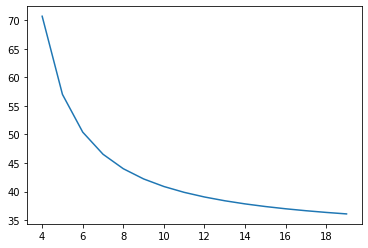

In [ ]:
import itertools as it
import numpy as np
import matplotlib.pyplot as plt

n_max = 20 # gets really slow once you go > 15ish
y = np.zeros(n_max-4)

for n in range(4,n_max+1):
  count=0

  def empty_check(set1, set2, set3):
    empty_count=0

    if set1.intersection(set2) == set():
      empty_count = empty_count+1

    if set1.intersection(set3) == set():
      empty_count = empty_count+1

    if set2.intersection(set3) == set():
      empty_count = empty_count+1

    if empty_count < 2:
      return True
    
    return False

  for i in it.product(range(1,n+1), repeat=6):
    set1 = {i[0], i[1]}
    set2 = {i[2], i[3]}
    set3 = {i[4], i[5]}

    if empty_check(set1,set2,set3):
      count=count+1

  y[n-5] = count/(n*(n-1)*(n-2)*(n-3))
  print(count/(n*(n-1)*(n-2)*(n-3)))

plt.plot(np.arange(4,n_max),y)

# OLD METHODS:

In [ ]:
n=12
count=n**6

def check(i_check, j_check, i_other1, j_other1, i_other2, j_other2):
  if i_check != i_other1 and i_check != i_other2:
    if j_check != j_other1 and j_check != j_other2:
      return True

  return False


# gross
for i1 in range(1,n+1):
  for i2 in range(1,n+1):
    for i3 in range(1,n+1):
      for j1 in range(1,n+1):
        for j2 in range(1,n+1):
          for j3 in range(1,n+1):
              #if (i1 == i2 and (j1==j3 or j2==j3)) or (i1 == i3 and (j1 == j2 or j2 == j3)) or (i2 == i3 and (j1 == j2 or j1 == j3)):
              if check(i1,j1,i2,j2,i3,j3) or check(i2,j2,i1,j1,i3,j3) or check(i3,j3,i1,j1,i2,j2):
                count =  count-1

calc = 6*n**4 -6*n**3 + n**2

#print(6*n**4)
print(count/n**4)
print(calc)

124416
7.034722222222222
114192


New Method

In [ ]:
import itertools as it

n=12
count=0

def empty_check(set1, set2, set3):
  empty_count=0

  if set1.intersection(set2) == set():
    empty_count = empty_count+1

  if set1.intersection(set3) == set():
    empty_count = empty_count+1

  if set2.intersection(set3) == set():
    empty_count = empty_count+1

  if empty_count < 2:
    return True
  
  return False

for i in it.product(range(1,n+1), repeat=6):
  set1 = {i[0], i[1]}
  set2 = {i[2], i[3]}
  set3 = {i[4], i[5]}

  if empty_check(set1,set2,set3):
    count=count+1

print(32*n*(n-1)*(n-2)*(n-3))
print(count/(n*(n-1)*(n-2)*(n-3)))

380160
39.86767676767677
